# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import datetime as dt
import seaborn as sns; sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Data=pd.read_csv('/content/Amazon Sales data.csv')

In [ ]:
Data.shape

(100, 14)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
# converting to datetime format
Data['Order Date'] = pd.to_datetime(Data['Order Date'])
Data['Ship Date'] = pd.to_datetime(Data['Ship Date'])


In [ ]:
Data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
# checking the null values
Data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
# Checking Duplicate Values
Data.duplicated().sum()

0

In [ ]:
Data.groupby("Sales Channel").count()["Item Type"]

Sales Channel
Offline    50
Online     50
Name: Item Type, dtype: int64

<Axes: title={'center': 'Critical priority items'}, xlabel='Item Type'>

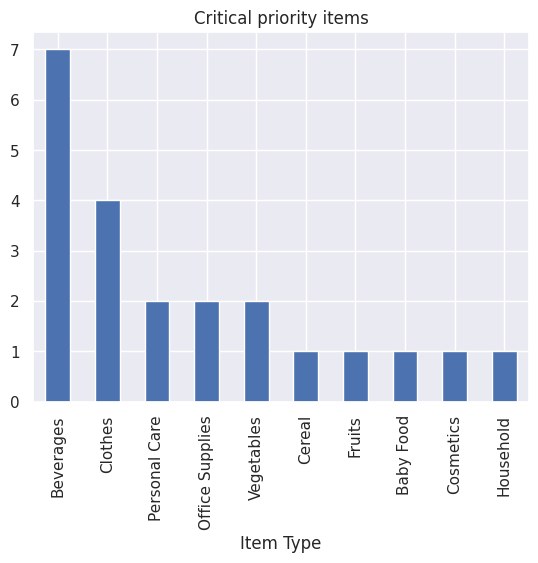

In [ ]:
# critical priority items
Data[Data['Order Priority']=='C']["Item Type"].value_counts().plot(kind='bar',title='Critical priority items')

<Axes: title={'center': 'High priority items'}, xlabel='Item Type'>

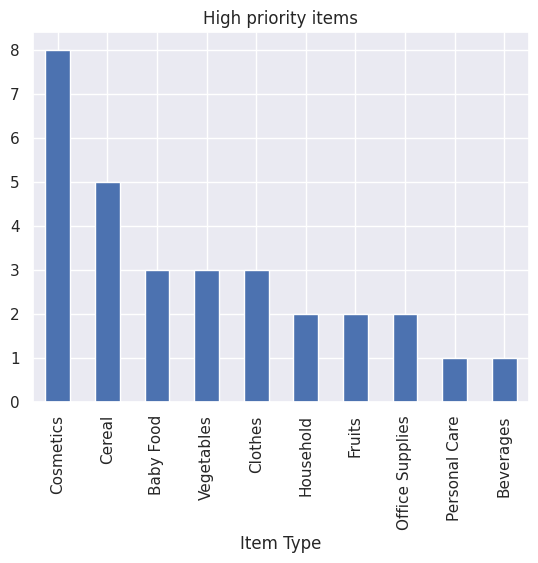

In [ ]:
# High priority items
Data[Data['Order Priority']=='H']["Item Type"].value_counts().plot(kind='bar',title='High priority items')


<Axes: title={'center': 'Medium priority items'}, xlabel='Item Type'>

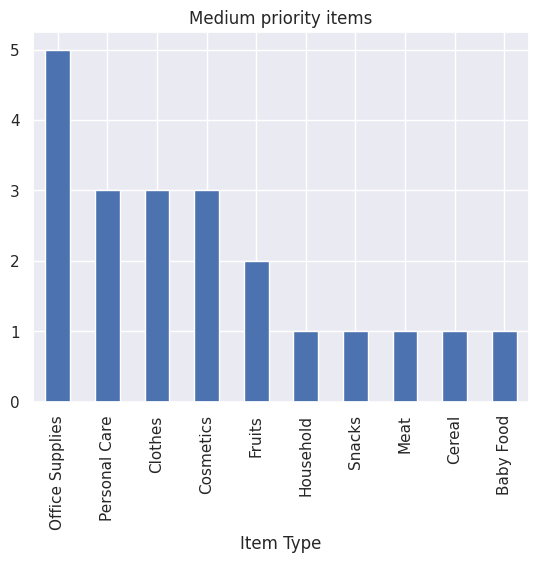

In [ ]:
Data[Data['Order Priority']=='M']["Item Type"].value_counts().plot(kind='bar',title='Medium priority items')


In [ ]:
# unique values present in data per column
for i in Data.columns:
  print(f"{i}:{len(Data[i].unique())}")

Region:7
Country:76
Item Type:12
Sales Channel:2
Order Priority:4
Order Date:100
Order ID:100
Ship Date:99
Units Sold:99
Unit Price:12
Unit Cost:12
Total Revenue:100
Total Cost:100
Total Profit:100


In [ ]:
Data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

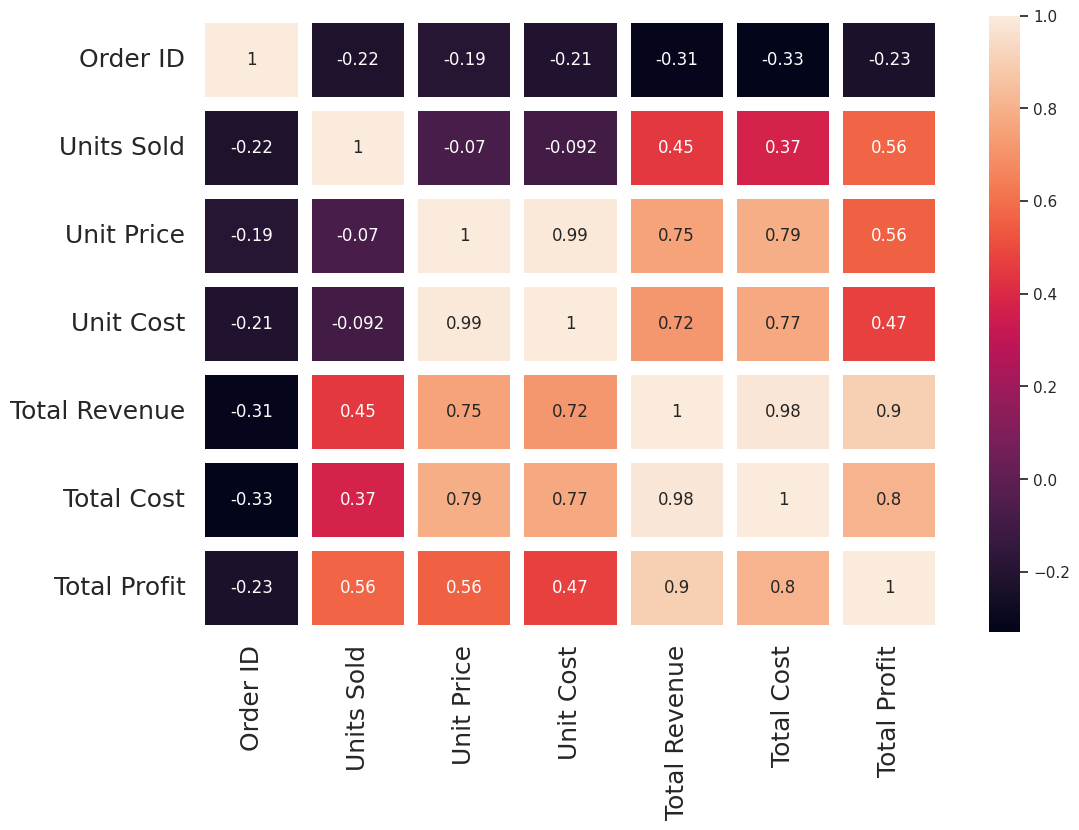

In [ ]:
# checking the correlation

plt.figure(figsize=(12,8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# Selecting only numeric columns from the DataFrame
numeric_df = Data.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, linewidths=10)
plt.show()

In [ ]:
# Last Order of items
max(Data['Order Date'])


Timestamp('2017-05-22 00:00:00')

In [ ]:
# first Order of items
min(Data['Order Date'])

Timestamp('2010-02-02 00:00:00')

**Insights:**

-> Most frequently Orderd items:

Critical Priority: "Breverages,clothes,personal care"

High Priority: "Cosmetic,cereal,Baby food"

Low Priority: "House hold,Personal Care,fruits"

-> As per the pearson correlation we can identify that:
    
   - Units sold are not affecting the unit pricing with
   great impact.
   - Total Profits are highly corelated with revenue is very highly correlated with total cost.

    we have our first order was on 2010-02-02

    last order was on 2017-05-22

    total number of Orders is 100
    
    total number of items is 12


In [ ]:
df_amazon=Data.copy()

In [ ]:
df_amazon.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
# Extracting Year from OrderDate
df_amazon['Year'] = df_amazon['Ship Date'].dt.year

#df_amazon['Quartely'] = df_amazon['Ship Date'].dt.quarter
#df_amazon['Day'] = df_amazon['Ship Date'].dt.day

# Extracting Month from OrderDate
df_amazon['MonthName'] = df_amazon['Ship Date'].dt.month

# Extracting Month Year from OrderDate
# df_amazon['year_month'] = df_amazon['Ship Date'].apply(lambda x:x.strftime('%Y-%m'))
df_amazon['year_month'] = df_amazon['Ship Date'].dt.strftime('%m-%y')
df_amazon['Unit Margin'] = df_amazon['Unit Price'] - df_amazon['Unit Cost']
#df_amazon['Total Sales'] = df_amazon['Unit Sold']*df_amazon['Unit Price']




In [ ]:
df_amazon

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,MonthName,year_month,Unit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,6,06-10,95.86
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,9,09-12,88.59
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,05-14,126.25
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,7,07-14,2.41
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,02-13,126.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,9,09-11,73.44
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,12,12-11,2.41
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,06-16,63.13
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,8,08-15,25.06


In [ ]:
df_amazon[df_amazon['Unit Margin']==max(df_amazon['Unit Margin'])]["Item Type"].unique()

array(['Cosmetics'], dtype=object)

In [ ]:
df_amazon[df_amazon['Unit Margin']==min(df_amazon['Unit Margin'])]["Item Type"].unique()


array(['Fruits'], dtype=object)

In [ ]:
df_amazon["Item Type"].mode()


0      Clothes
1    Cosmetics
Name: Item Type, dtype: object

In [ ]:
df_amazon.groupby("Region")["Item Type"].count()


Region
Asia                                 11
Australia and Oceania                11
Central America and the Caribbean     7
Europe                               22
Middle East and North Africa         10
North America                         3
Sub-Saharan Africa                   36
Name: Item Type, dtype: int64

Hence by applying margin columns we can get the high margin product which is cosmetics and low margin product is Fruits

Most frequently order items are Clothes and Cosmetics

Maximum orders are from Sub-Saharan Africa Region

least from North America Region

In [ ]:
# Give the proper format to the orderdate column

#format_date = Data['Order Date'].dt.strftime("%Y-%m-%d")


# **Yearly trend Analysis**

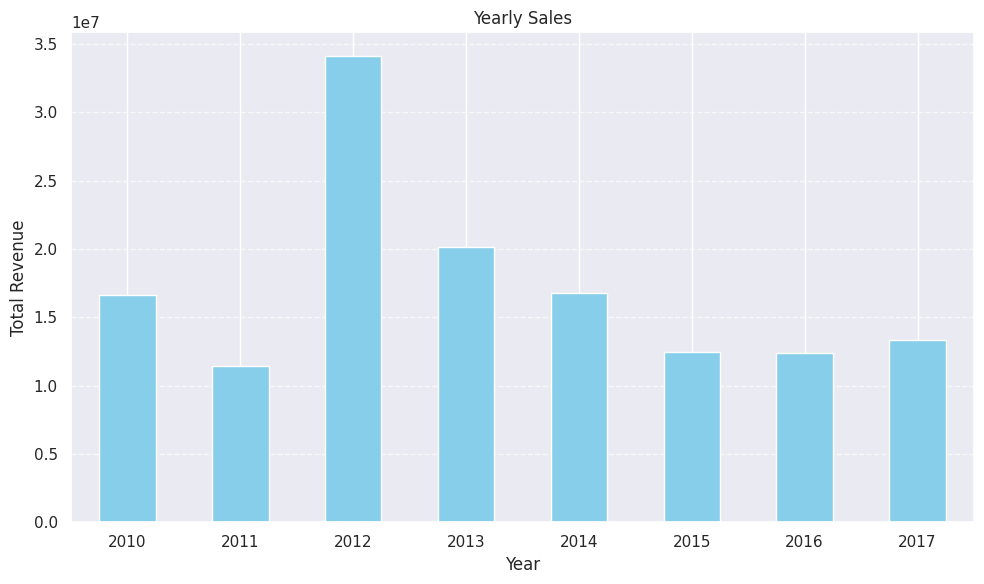

In [ ]:
# Calculating Year wise Sales

yearly_sales= df_amazon.groupby('Year')['Total Revenue'].sum()
# Plotting the bar chart
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

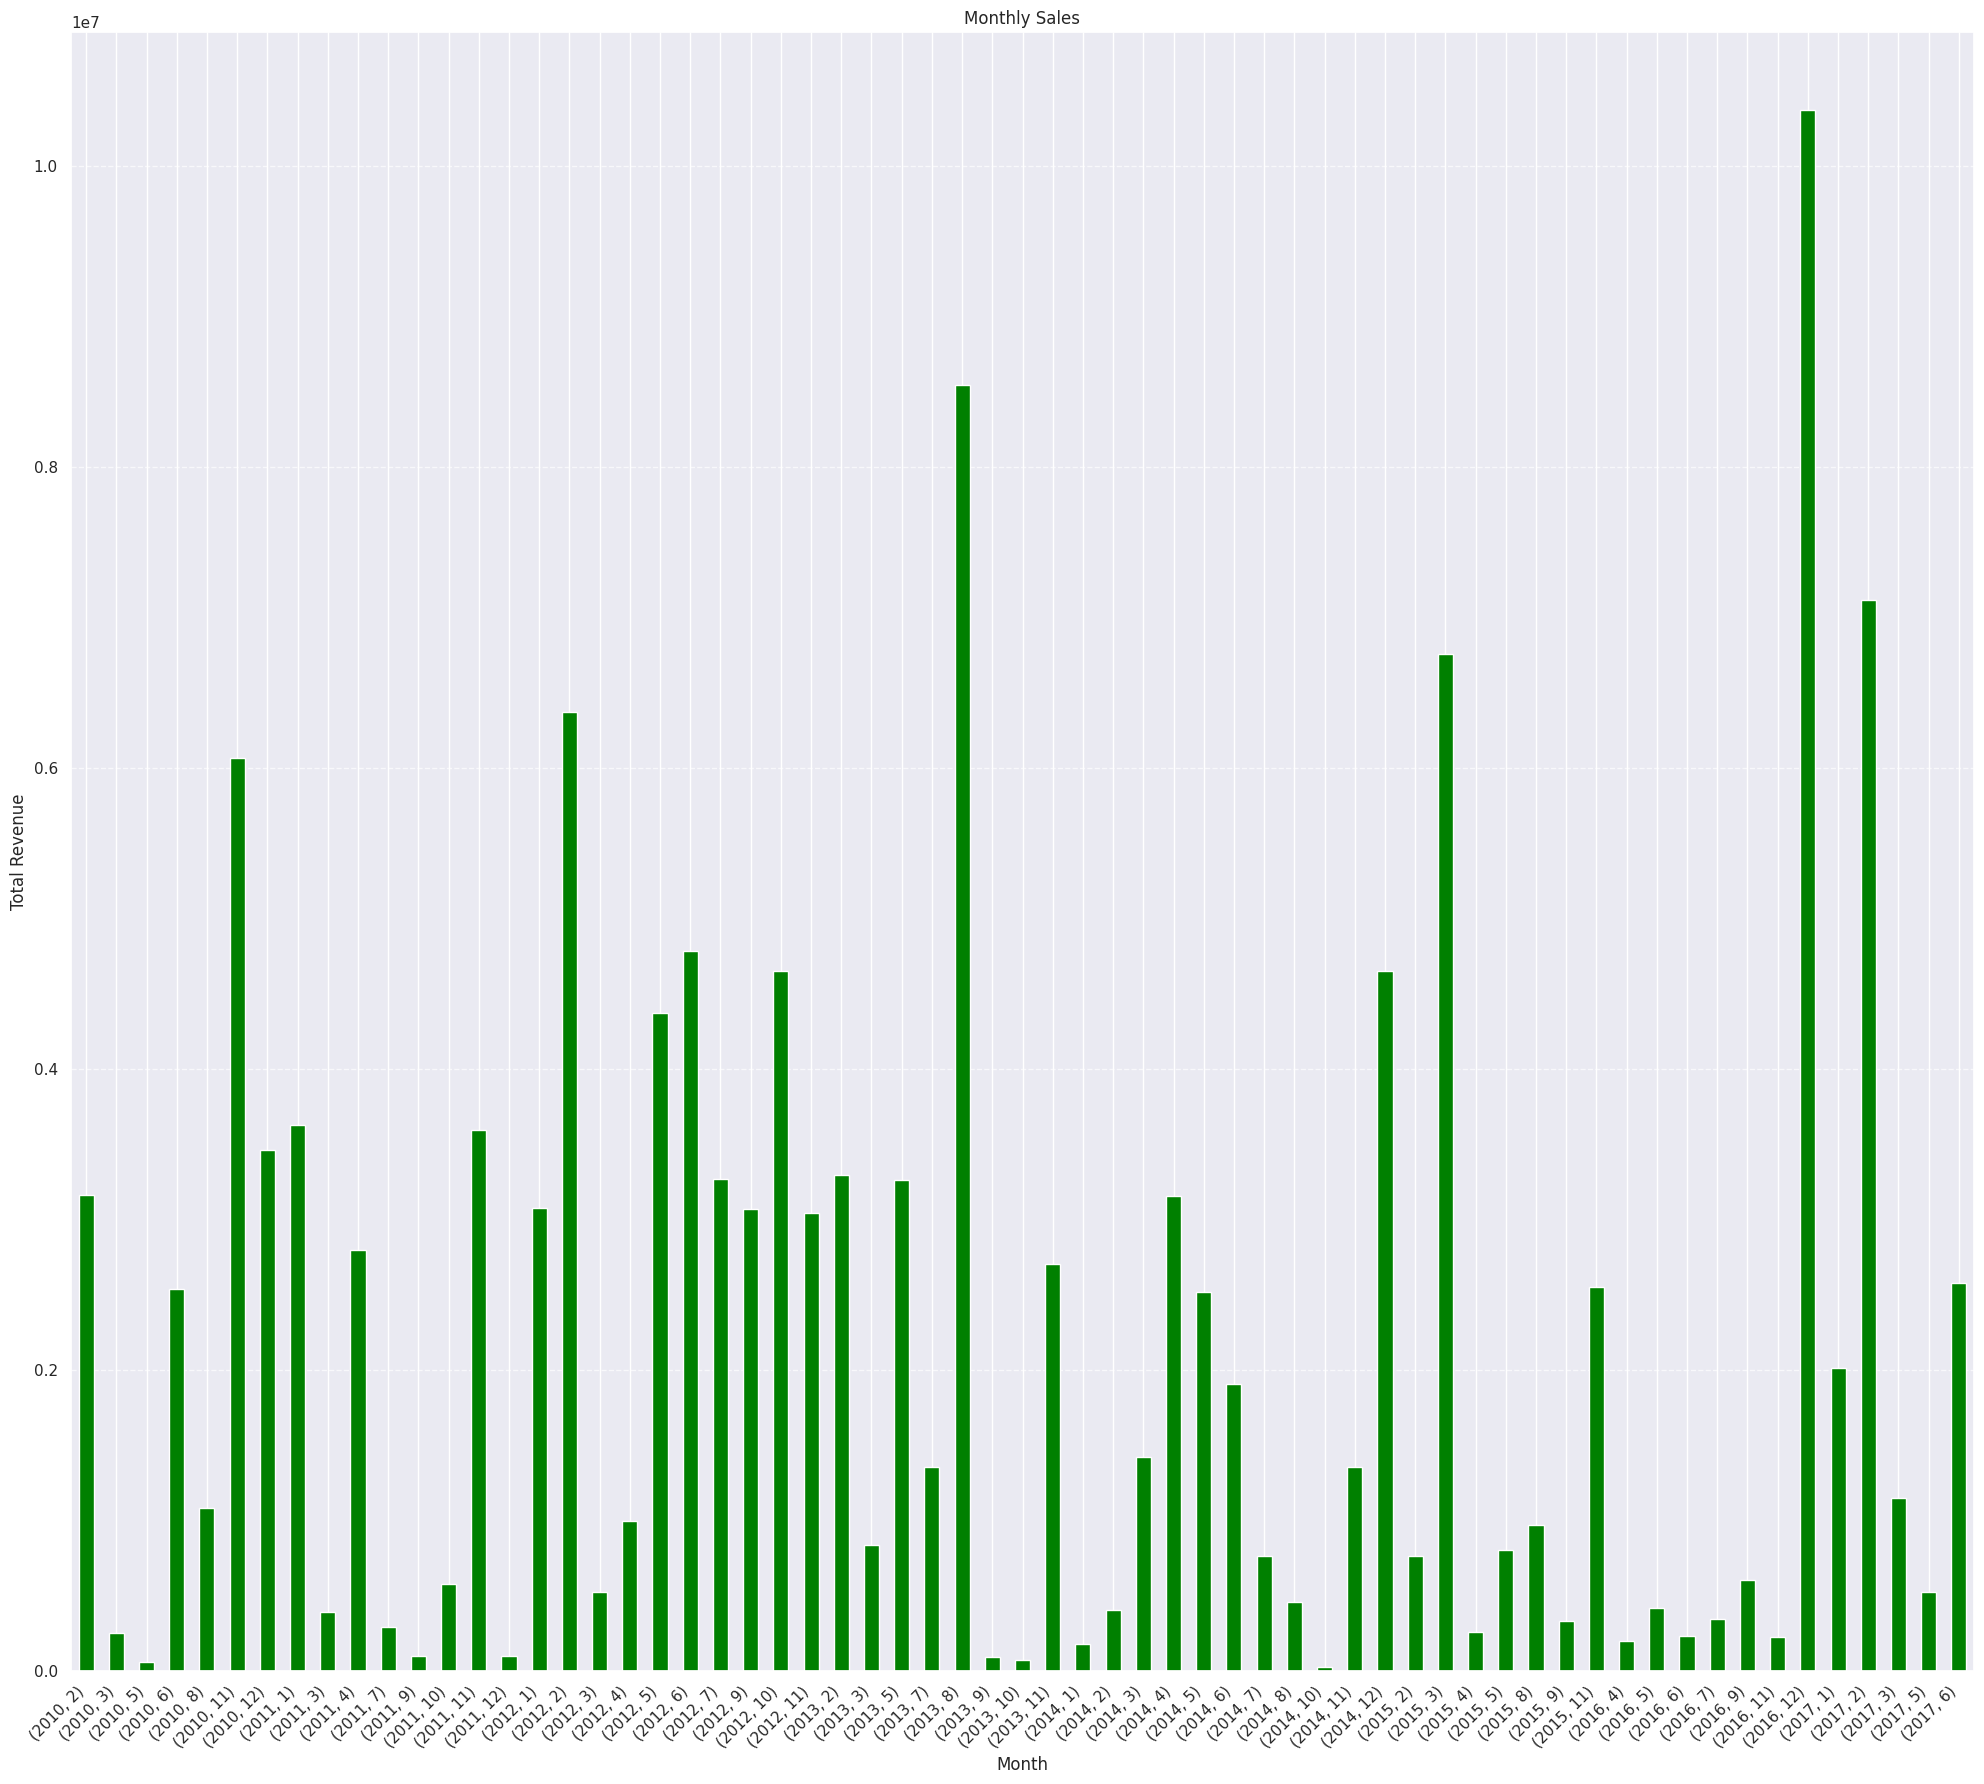

In [ ]:
# plotting a line chart to show monthly sales

monthly_sales = df_amazon.groupby(['Year', 'MonthName'])['Total Revenue'].sum()
plt.figure(figsize=(20, 18))
monthly_sales.plot(kind='bar',color='green')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




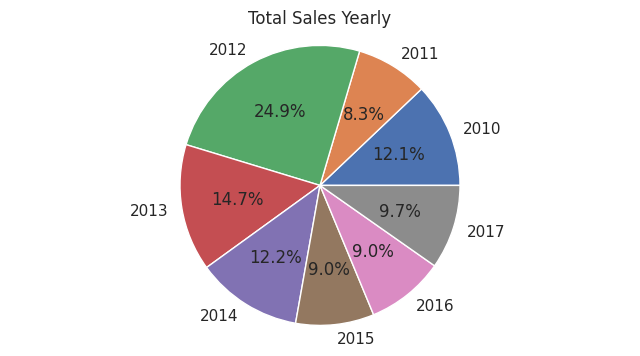

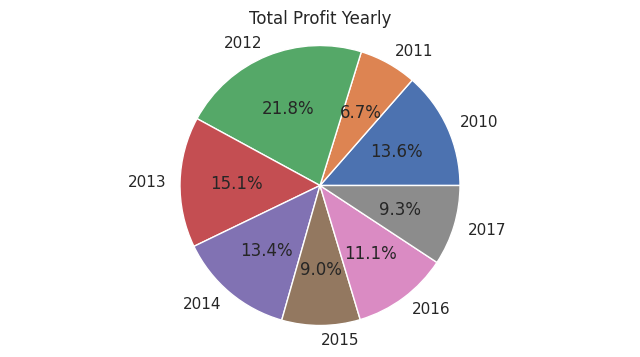

In [ ]:
# plotting piechart to know YoY(Year-over-Year) sales and Yearly Profit
sales_per_year = df_amazon.groupby('Year')['Total Revenue'].sum()
profit_per_year = df_amazon.groupby('Year')['Total Profit'].sum()

plt.figure(figsize=(8, 4))
plt.pie(sales_per_year, labels=sales_per_year.index, autopct='%1.1f%%')
plt.title('Total Sales Yearly')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

plt.figure(figsize=(8, 4))
plt.pie(profit_per_year, labels=profit_per_year.index, autopct='%1.1f%%')
plt.title('Total Profit Yearly')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


**highest Sales is in 2012(24.9%) and 2013(14.7%)**

**Highest Profit is in 2012(21.8%) and 2013(15.1%)**

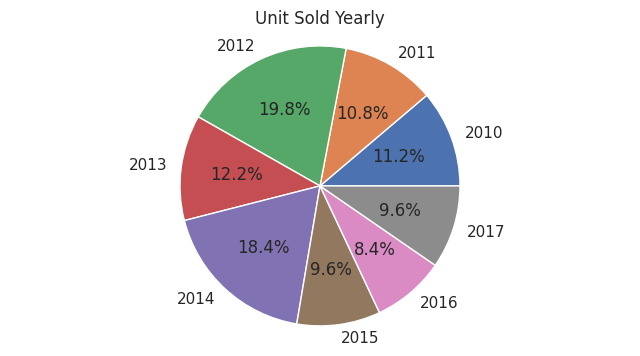

In [ ]:
# plotting piechart to know YoY(Year-over-Year) Units Sold

unitsold_per_year = df_amazon.groupby('Year')['Units Sold'].sum()

plt.figure(figsize=(8, 4))
plt.pie(unitsold_per_year, labels=unitsold_per_year.index, autopct='%1.1f%%')
plt.title('Unit Sold Yearly')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Yearly Total Revenue by Item Type
Yearly_sales_data = df_amazon.groupby(["Item Type","Year"]).agg({
    'Total Revenue': 'sum',
    'Units Sold': 'sum',
    'Total Profit': 'sum'
})
Yearlysale = Yearly_sales_data.sort_values("Total Revenue", ascending=False)

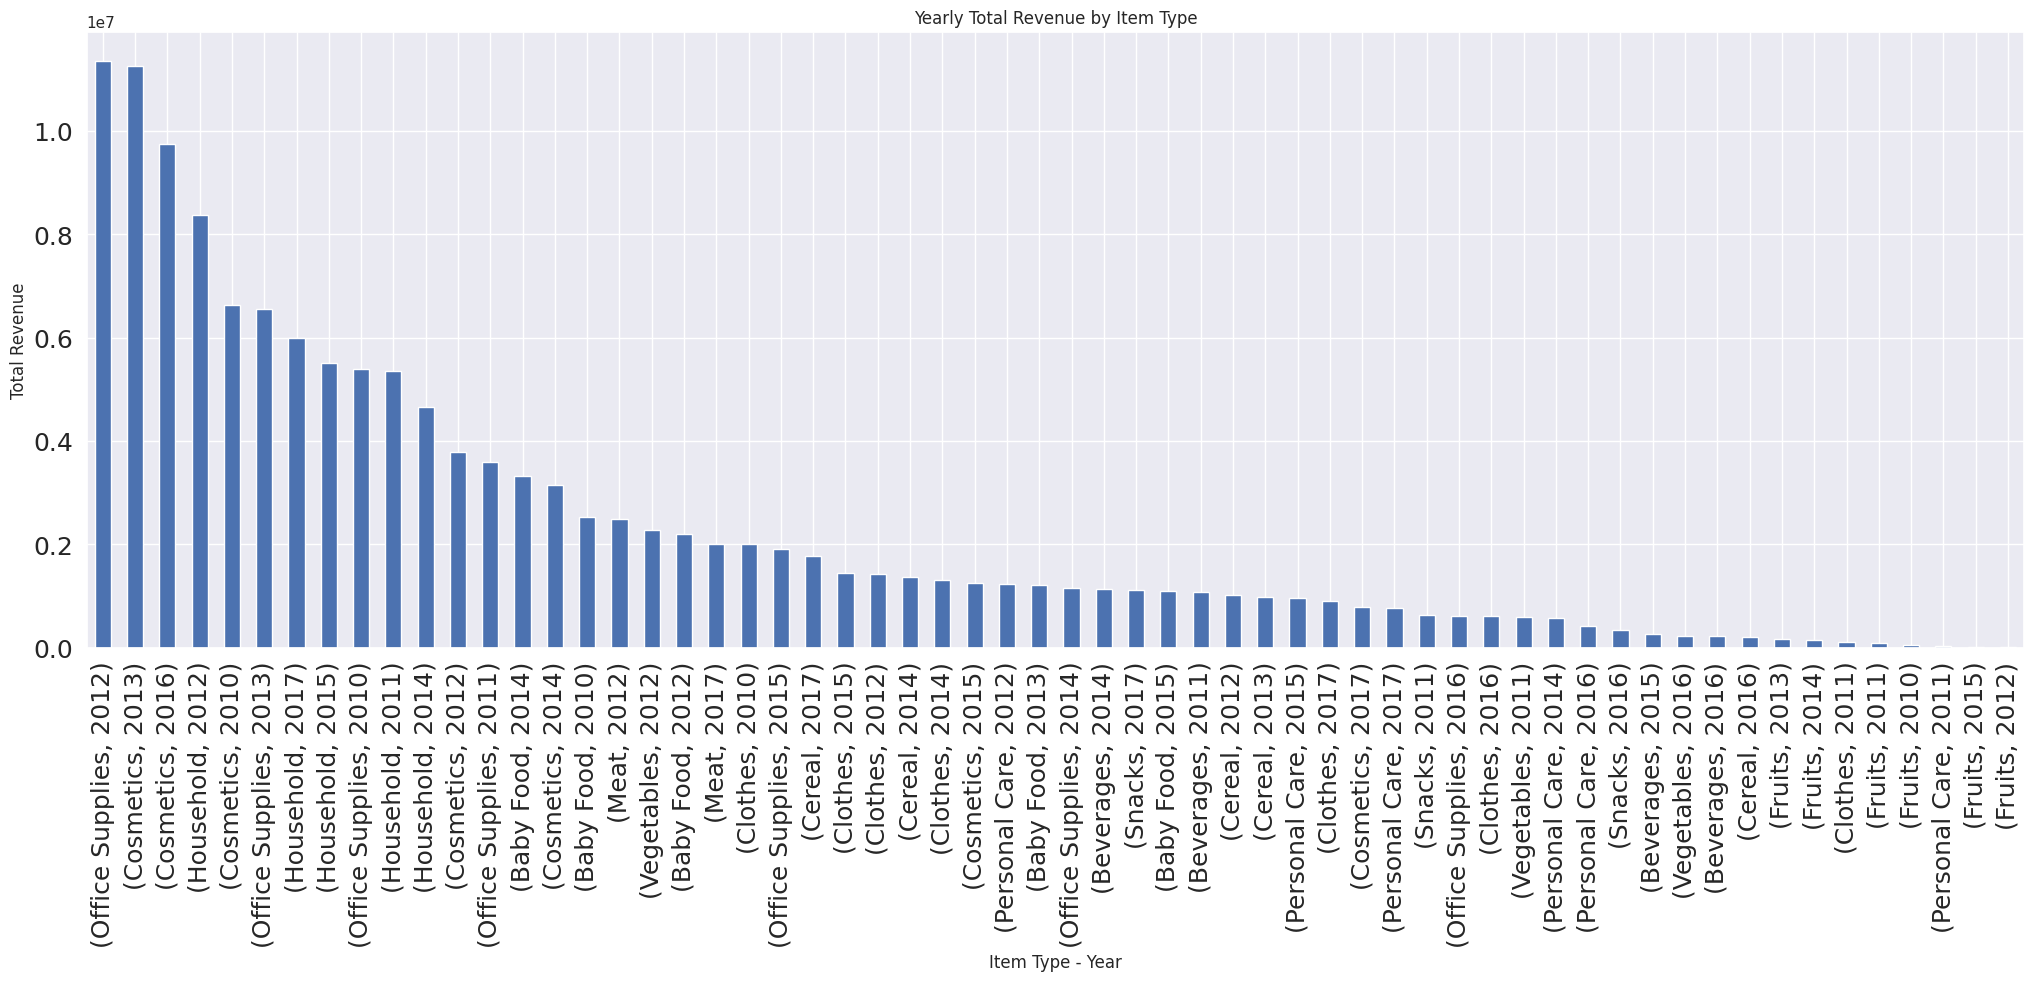

In [ ]:
Yearlysale['Total Revenue'].plot(figsize=(25,8), kind="bar", fontsize=18, xlabel='Item Type - Year', ylabel='Total Revenue', title='Yearly Total Revenue by Item Type')
plt.show()

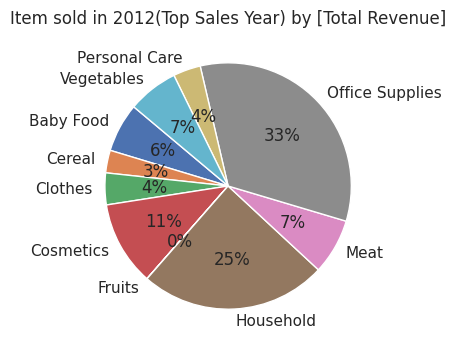

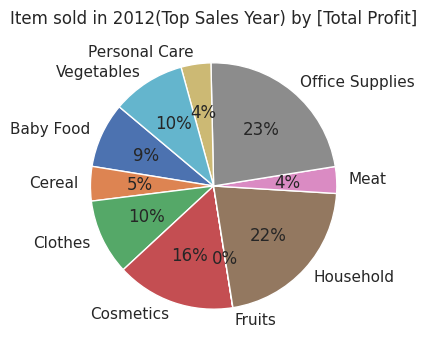

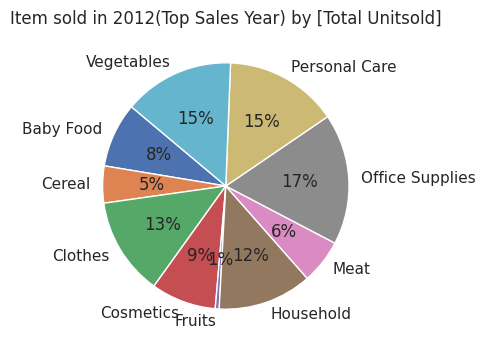

In [ ]:
# maximum item contribution in top sales year

# Find the top sales year
top_sales_year = df_amazon.groupby('Year')['Units Sold'].sum().idxmax()
top_year_data = df_amazon[df_amazon['Year'] == top_sales_year]

# Filter data for the top sales year and calculate total sales for each item
item_total_sales = top_year_data.groupby('Item Type')['Total Revenue'].sum()
item_total_profit = top_year_data.groupby('Item Type')['Total Profit'].sum()
item_total_unitsold = top_year_data.groupby('Item Type')['Units Sold'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 4))
plt.title('Item sold in 2012(Top Sales Year) by [Total Revenue]')
plt.pie(item_total_sales, labels=item_total_sales.index, autopct='%0.0f%%', startangle=140)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Item sold in 2012(Top Sales Year) by [Total Profit]')
plt.pie(item_total_profit, labels=item_total_profit.index, autopct='%0.0f%%', startangle=140)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Item sold in 2012(Top Sales Year) by [Total Unitsold]')
plt.pie(item_total_unitsold, labels=item_total_unitsold.index, autopct='%0.0f%%', startangle=140)
plt.show()


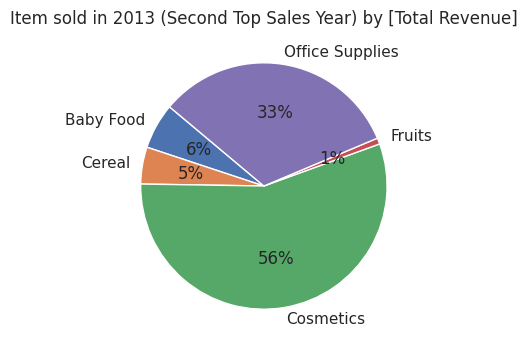

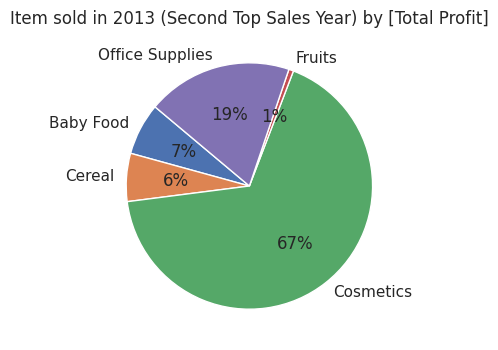

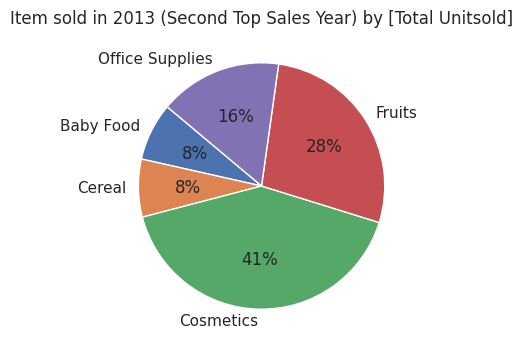

In [ ]:
# item sold in second top year(2013)

# Find the top 2 sales years
top_sales_years = df_amazon.groupby('Year')['Total Profit'].sum().nlargest(2).index
second_top_sales_year = top_sales_years[1]

second_top_year_data = df_amazon[df_amazon['Year'] == second_top_sales_year]

# Calculate total sales, total profit, and total units sold for each item in the second top sales year
item_total_sales = second_top_year_data.groupby('Item Type')['Total Revenue'].sum()
item_total_profit = second_top_year_data.groupby('Item Type')['Total Profit'].sum()
item_total_unitsold = second_top_year_data.groupby('Item Type')['Units Sold'].sum()

# Plotting the pie charts
plt.figure(figsize=(8, 4))
plt.title('Item sold in {} (Second Top Sales Year) by [Total Revenue]'.format(second_top_sales_year))
plt.pie(item_total_sales, labels=item_total_sales.index, autopct='%0.0f%%', startangle=140)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Item sold in {} (Second Top Sales Year) by [Total Profit]'.format(second_top_sales_year))
plt.pie(item_total_profit, labels=item_total_profit.index, autopct='%0.0f%%', startangle=140)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Item sold in {} (Second Top Sales Year) by [Total Unitsold]'.format(second_top_sales_year))
plt.pie(item_total_unitsold, labels=item_total_unitsold.index, autopct='%0.0f%%', startangle=140)
plt.show()

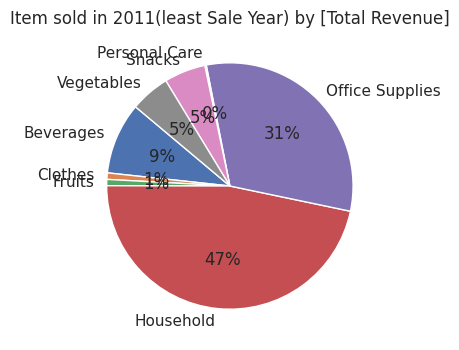

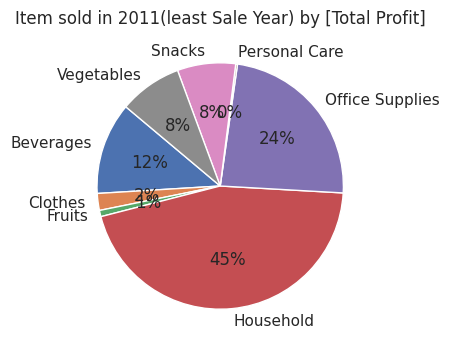

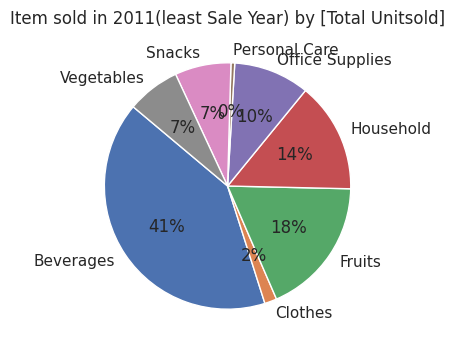

In [ ]:
# item sold in least sale year

# Find the least sales year
least_unitsold = df_amazon.groupby('Year')['Units Sold'].sum().idxmin()  # least year is 2016
least_Revenue = df_amazon.groupby('Year')['Total Revenue'].sum().idxmin() # least year is 2011
least_Profit = df_amazon.groupby('Year')['Total Profit'].sum().idxmin()  # least year is 2011

least_unitsold
least_year_data = df_amazon[df_amazon['Year'] == least_Revenue] # it is unitsold but we just want to 2011 unitsold so that's why we don't put unitsold least year i.e. 2016
least_year_data1 = df_amazon[df_amazon['Year'] == least_Revenue]
least_year_data2 = df_amazon[df_amazon['Year'] == least_Profit]


# Filter data for the top sales year and calculate total sales for each item
item_total_sales = least_year_data1.groupby('Item Type')['Total Revenue'].sum()
item_total_profit = least_year_data2.groupby('Item Type')['Total Profit'].sum()
item_total_unitsold = least_year_data.groupby('Item Type')['Units Sold'].sum()

#Plotting the pie chart
plt.figure(figsize=(8, 4))
plt.title('Item sold in 2011(least Sale Year) by [Total Revenue]')
plt.pie(item_total_sales, labels=item_total_sales.index, autopct='%0.0f%%', startangle=140)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Item sold in 2011(least Sale Year) by [Total Profit]')
plt.pie(item_total_profit, labels=item_total_profit.index, autopct='%0.0f%%', startangle=140)
plt.show()

plt.figure(figsize=(8, 4))
plt.title('Item sold in 2011(least Sale Year) by [Total Unitsold]')
plt.pie(item_total_unitsold, labels=item_total_unitsold.index, autopct='%0.0f%%', startangle=140)
plt.show()


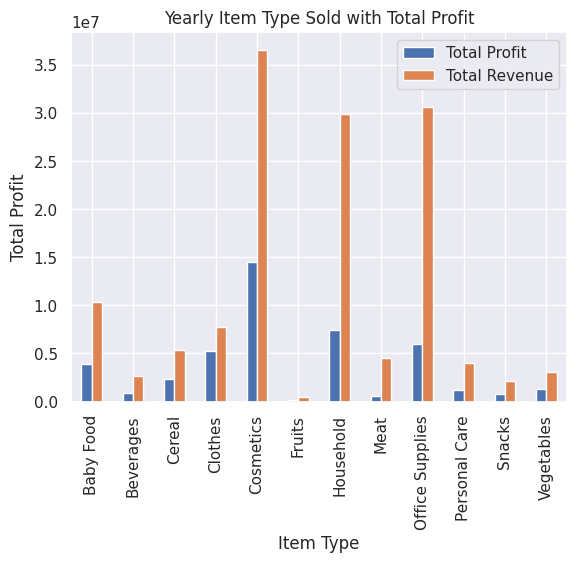

In [ ]:
# Plot the bar chart of Yearly Item Type Sold with Total Profit
yearly_profit_data = df_amazon.groupby("Item Type")[["Total Profit", "Total Revenue"]].sum()
yearly_profit_data.plot(kind="bar", title="Yearly Item Type Sold with Total Profit", ylabel="Total Profit")
plt.show()
#yearly_profit_data=df_amazon.groupby("Item Type").sum()[["Total Profit","Total Revenue"]].plot(kind="bar",title="Yearly item type sold with total profit",ylabel="Total Profit")

# **Yearly Insights:**
Yearly Item Sold
- 2012(1st top)

  - Most Sales from office supplies(33% of total sale)items with Household items(25% of total sale)
  - Most unit sold are from supplies
  - Most profitable items are Office supplies and Household
   
- 2013(2nd top)

  - Most Sales from Cosmetics(56% of total sale) items with
    office supplies(33% of total sale)
  - Most unit sold are Cosmetics and Fruits
  - Most profitable items are Cosmetics and Office supplies

- 2011(3nd top)

  - Most Sales from Household(47% of total sale) items and
    office supplies(31% of total sale)
  - Most unit sold are Beverages and Fruits
  - Most profitable items are Household


- Most profitable item from(2010-2017) is Cosmetics and
  House hold
- Most sold item from(2010-2017) is Cosmetics,Office
  supplies, House hold

# **Monthly Trends for Sales**

In [ ]:
df_amazon['Ship Date'].dt.strftime("%b")
Monthly_sales=df_amazon.groupby('MonthName')['Total Revenue'].sum()
Monthly_sales

MonthName
1      8884502.45
2     21105331.41
3     11322021.69
4      7402746.81
5     11945263.42
6     12019913.42
7      6016768.51
8     11050846.65
9      4188045.51
10     5314762.56
11    19528983.79
12    18569582.09
Name: Total Revenue, dtype: float64

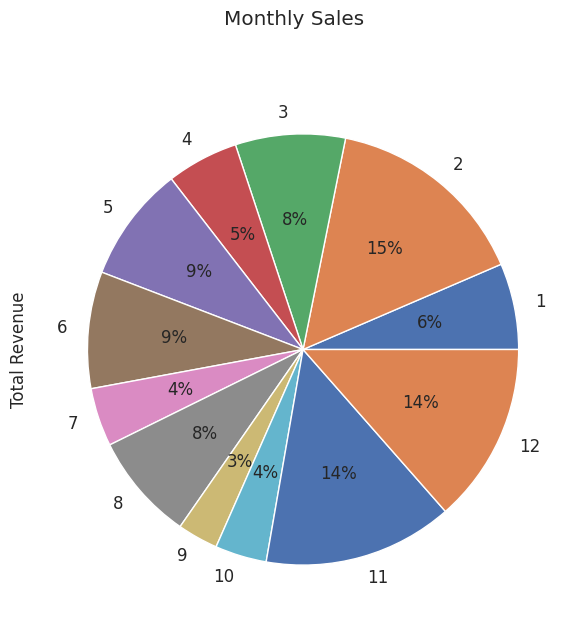

In [ ]:
Monthly_sales.plot(kind="pie", subplots=True, autopct='%1.0f%%', figsize=(7, 7), fontsize=12, title='Monthly Sales')
plt.show()

In [ ]:
# Grouping by 'Item Type' and 'MonthName' to get maximum sales per item with month
Monthly_sale = df_amazon.groupby(['Item Type', 'MonthName'])['Total Revenue'].sum().reset_index()

# Sorting the maximum sales in descending order
Monthly_sales = Monthly_sale.sort_values("Total Revenue", ascending=False)
# Displaying the top 10 items with maximum sales
top_items = Monthly_sales.head(10)
top_items


,Item Type,MonthName,Total Revenue
30,Cosmetics,12,13211309.60
50,Office Supplies,11,10894092.09
38,Household,2,9772112.21
48,Office Supplies,5,8789381.37
27,Cosmetics,8,8545511.20
2,Baby Food,6,6634471.92
47,Office Supplies,2,5892799.29
39,Household,3,5513227.50
43,Household,12,4647149.58
28,Cosmetics,10,3786589.20


## Frequently of Items in top 3 sales months

<Axes: title={'center': 'Febuary most Frequently ordered item '}, xlabel='Item Type'>

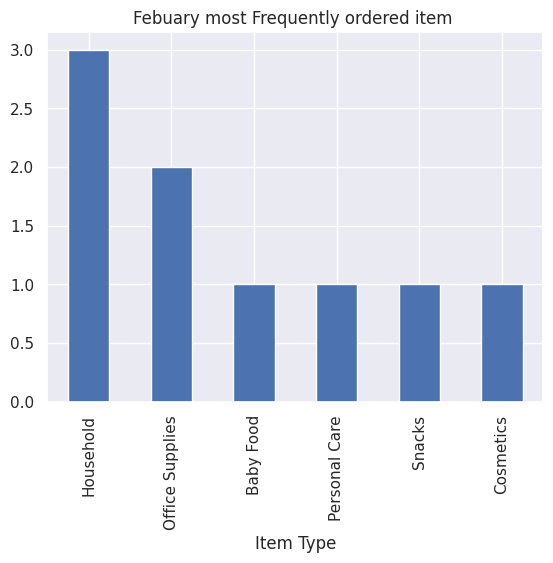

In [ ]:
df_amazon[df_amazon['MonthName']==2]['Item Type'].value_counts().plot(kind='bar',title='Febuary most Frequently ordered item ')

<Axes: title={'center': 'November most Frequently ordered item '}, xlabel='Item Type'>

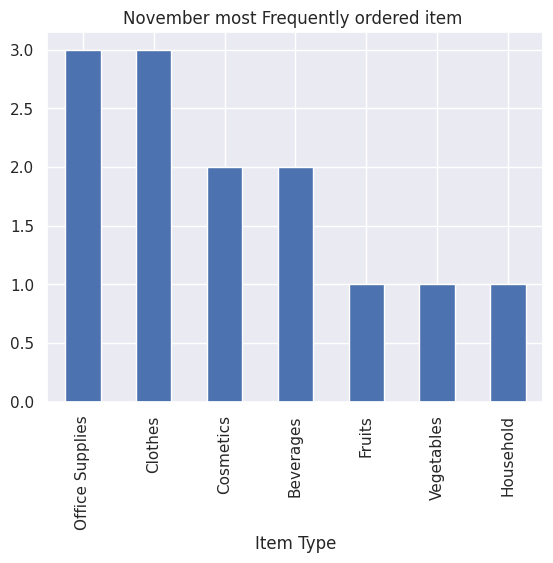

In [ ]:
df_amazon[df_amazon['MonthName']==11]['Item Type'].value_counts().plot(kind='bar',title='November most Frequently ordered item ')


<Axes: title={'center': 'December most Frequently ordered item '}, xlabel='Item Type'>

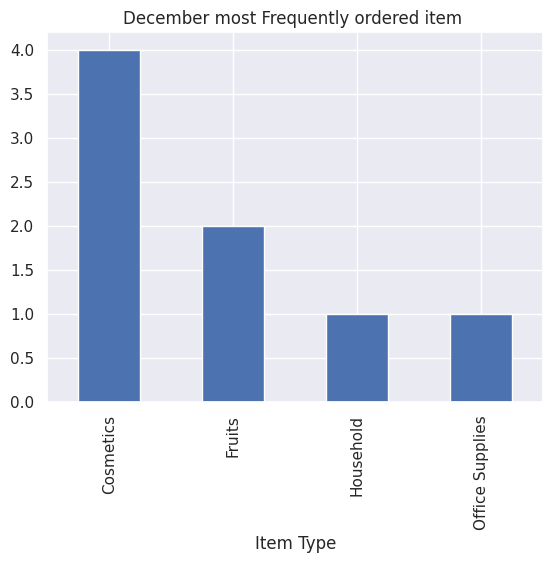

In [ ]:
df_amazon[df_amazon['MonthName']==12]['Item Type'].value_counts().plot(kind='bar',title='December most Frequently ordered item ')


<Axes: title={'center': 'February Units Sold'}, ylabel='Units Sold'>

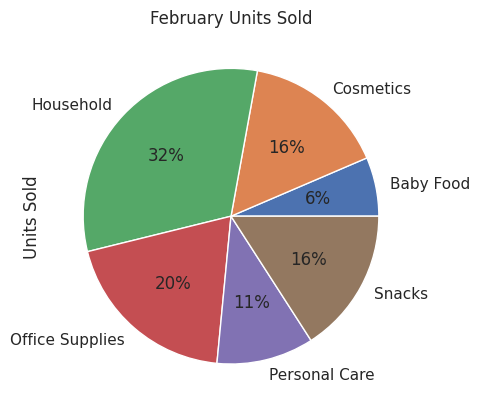

In [ ]:
df_amazon[df_amazon['MonthName'] == 2].groupby('Item Type')['Units Sold'].sum().reset_index().set_index("Item Type").plot(kind="pie", y="Units Sold", autopct="%1.0f%%", legend=False, title="February Units Sold")



<Axes: title={'center': 'December Units Sold'}, ylabel='Units Sold'>

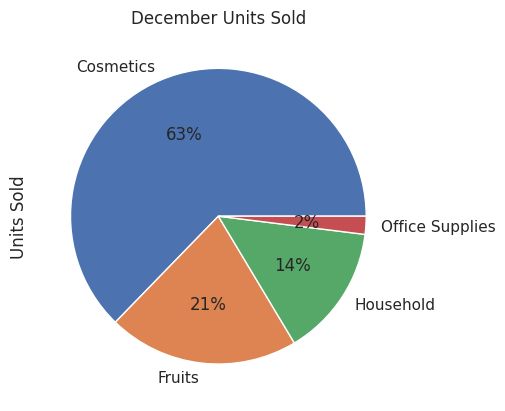

In [ ]:
df_amazon[df_amazon['MonthName'] == 12].groupby('Item Type')['Units Sold'].sum().reset_index().set_index("Item Type").plot(kind="pie", y="Units Sold", autopct="%1.0f%%", legend=False, title="December Units Sold")


<Axes: title={'center': 'November Units Sold'}, ylabel='Units Sold'>

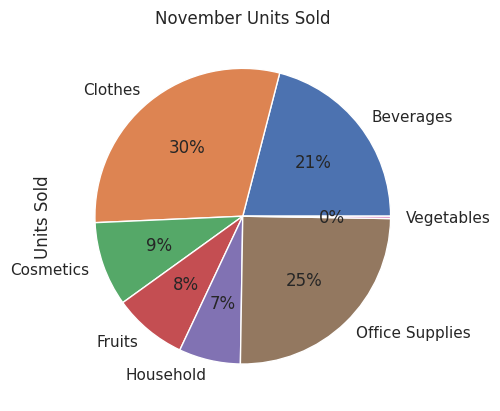

In [ ]:
df_amazon[df_amazon['MonthName'] == 11].groupby('Item Type')['Units Sold'].sum().reset_index().set_index("Item Type").plot(kind="pie", y="Units Sold", autopct="%1.0f%%", legend=False, title="November Units Sold")


In [ ]:
Monthly_sale.reset_index()["Item Type"].value_counts()



Item Type
Cosmetics          8
Clothes            7
Household          7
Cereal             6
Fruits             6
Office Supplies    6
Personal Care      6
Baby Food          5
Beverages          5
Vegetables         5
Snacks             3
Meat               2
Name: count, dtype: int64

<Axes: title={'center': 'Most frequently ordered items(>2)'}, xlabel='MonthName,Item Type'>

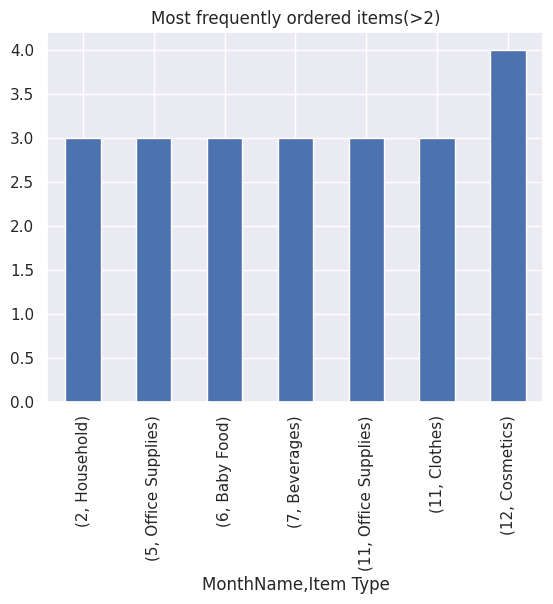

In [ ]:
_A=df_amazon.groupby("MonthName")["Item Type"].value_counts()
_A[_A>2].plot(kind='bar',title="Most frequently ordered items(>2)")

febuary has maximum sales i.e. 15% where in november and December there is 2nd highest sale in both month has equal sales i.e 14% of total sales

Most frequently order item:

 - febuary has Household products it is almost 32% of total sold items in that month

 - November has Clothes it is almost 30% and  Office Supplies it is almost 25% of total sold items in that month

 - December has Cosmetics it is almost 63% of total sold items in that month

Hence we can manage our inventory accordingly as we are having most common items for most of month:
    
    -- Cosmetics, Household,Colthes,Office Supplies, Cereal, Personal Care, Fruits

# **Month -Yearly trend Analysis**

In [ ]:
df_amazon['Year'] = df_amazon['Year'].astype(int)
df_amazon['MonthName'] = df_amazon['MonthName'].astype(str)  # Convert to string or categorical if needed


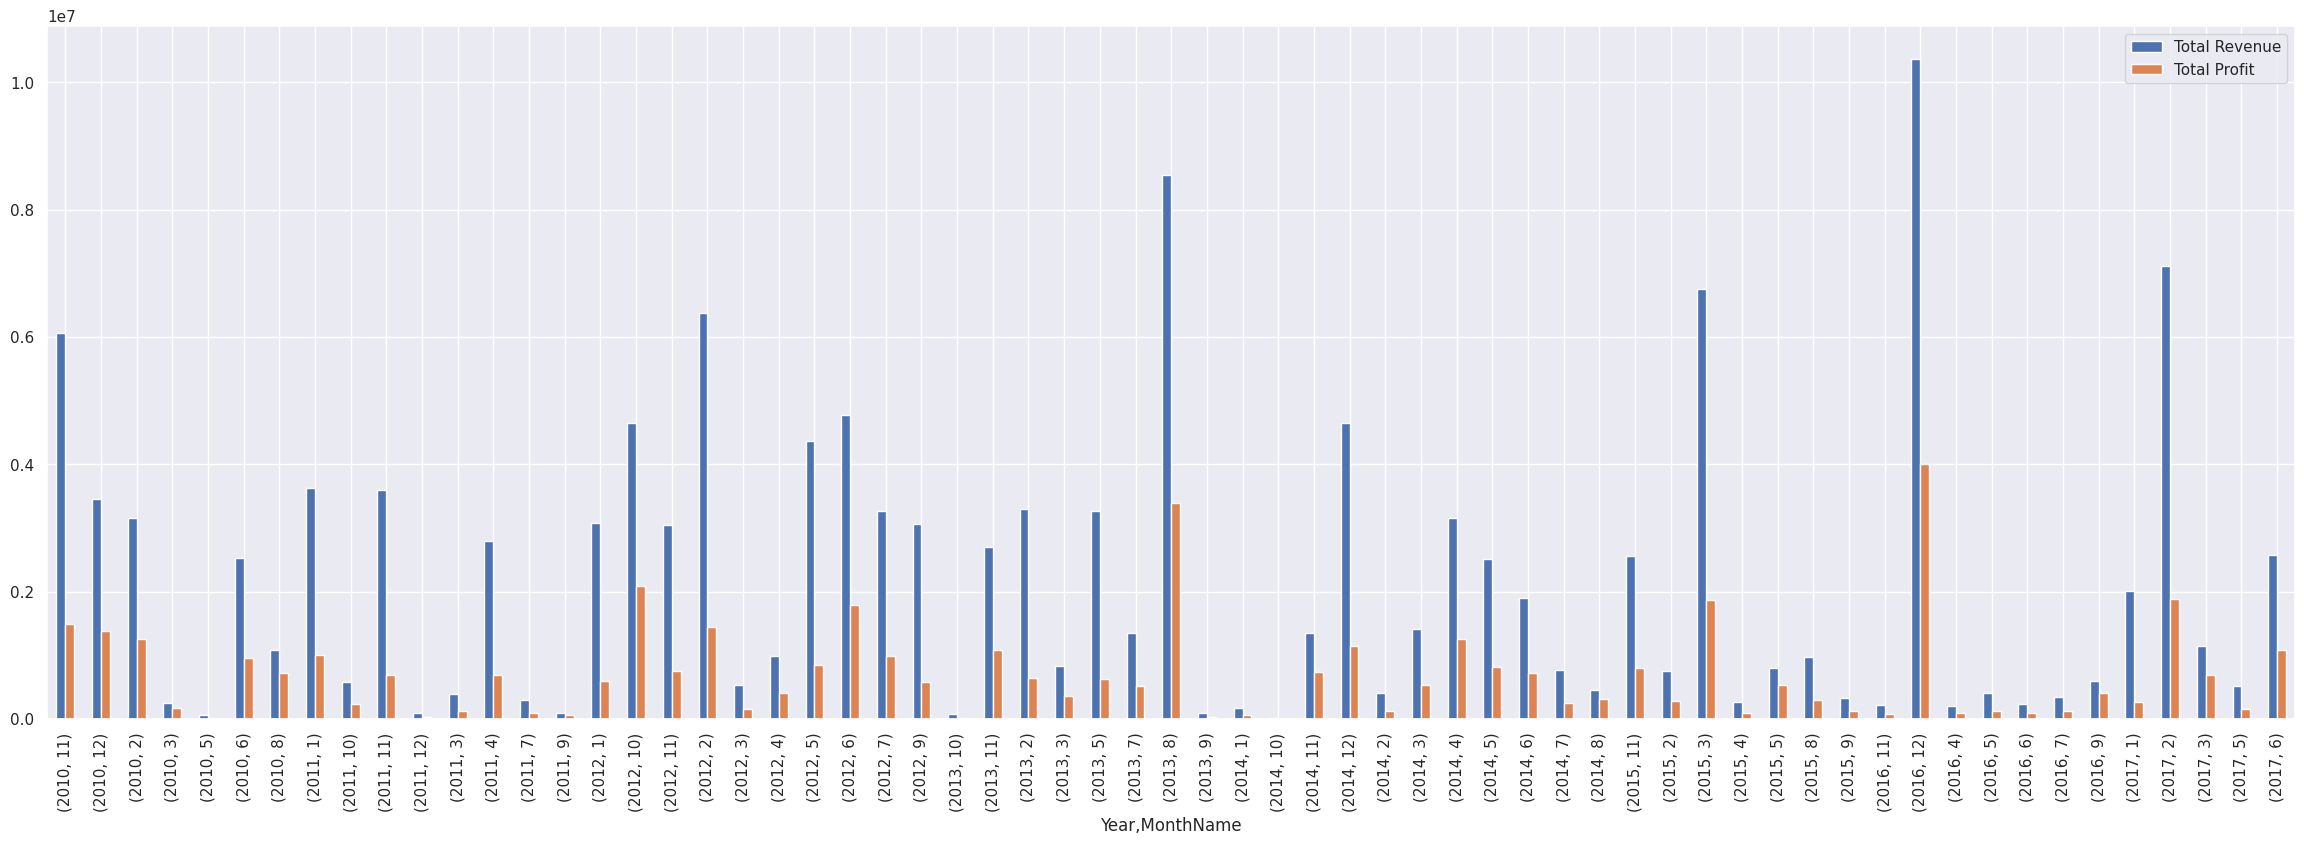

In [ ]:
my_sum_data=df_amazon.groupby(['Year', 'MonthName'])[['Total Revenue', 'Total Profit']].sum().plot(kind='bar', figsize=(29,9))




<Axes: xlabel='Year,MonthName'>

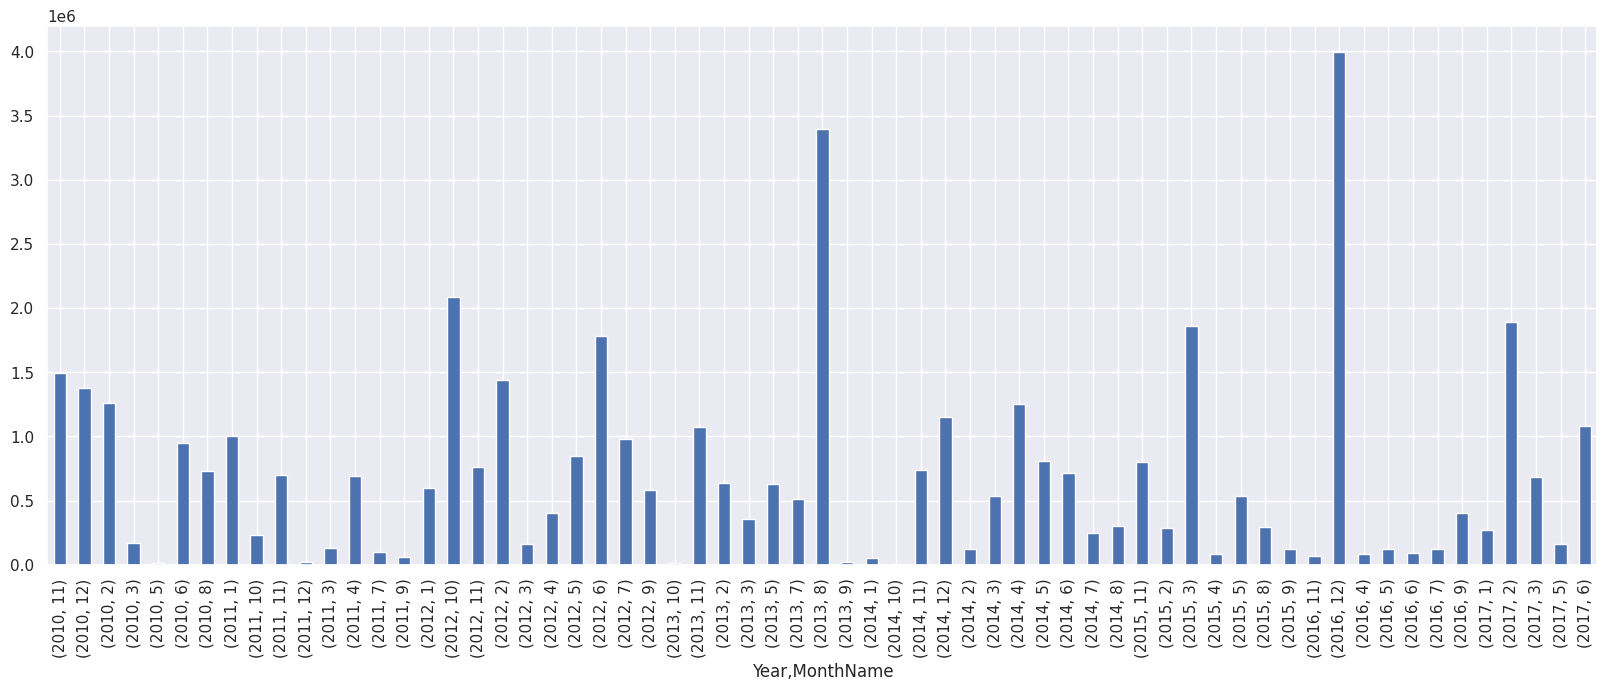

In [ ]:
df_amazon.groupby(['Year', 'MonthName'])[["Total Profit"]].sum().plot(kind="bar",figsize=(20,7),legend=False)

In [ ]:
my_data = df_amazon.groupby(["Item Type", "Year", "MonthName"])['Units Sold'].sum()

min_item_type = my_data.idxmin()
max_item_type = my_data.idxmax()

print(f"Minimum units sold: {my_data[min_item_type]} units sold in {min_item_type[2]} {min_item_type[1]} for item type '{min_item_type[0]}'")
print(f"Maximum units sold: {my_data[max_item_type]} units sold in {max_item_type[2]} {max_item_type[1]} for item type '{max_item_type[0]}'")







Minimum units sold: 124 units sold in 7 2011 for item type 'Vegetables'
Maximum units sold: 22308 units sold in 12 2016 for item type 'Cosmetics'


<Axes: title={'center': 'Items more than average units sold'}, xlabel='Item Type,Year,MonthName'>

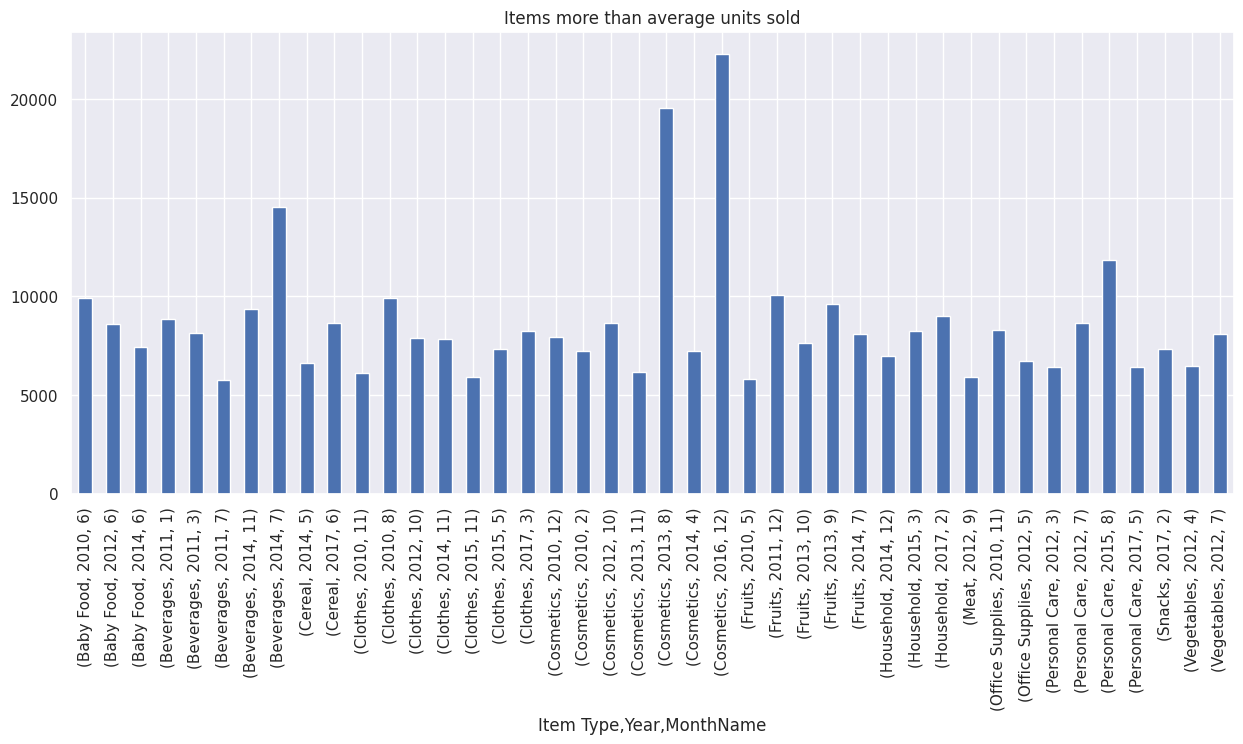

In [ ]:
# Displaying Items more than average unit sold

average_unit = my_data.mean()
my_data[my_data > average_unit].plot(kind="bar", figsize=(15, 6), title="Items more than average units sold")



<Axes: title={'center': 'Items less than average units sold'}, xlabel='Item Type,Year,MonthName'>

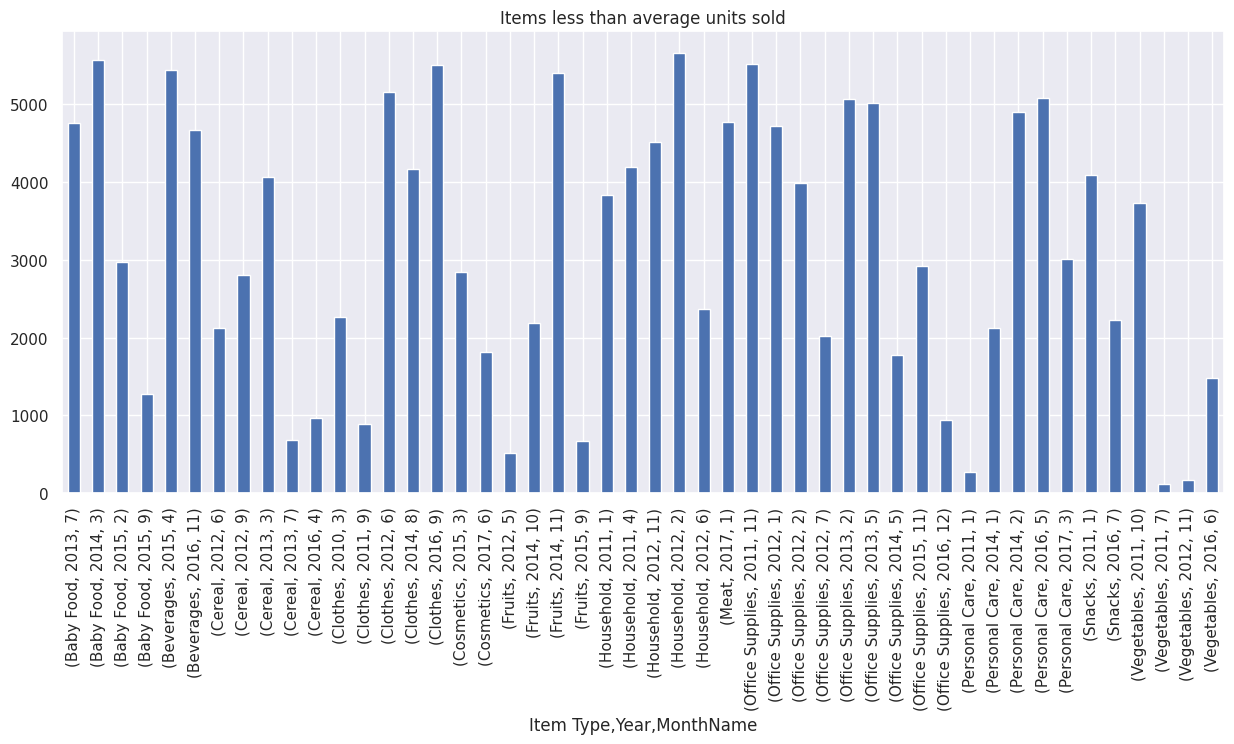

In [ ]:
# Displaying Items less than average unit sold
average_unit = my_data.mean()
my_data[my_data < average_unit].plot(kind="bar", figsize=(15, 6), title="Items less than average units sold")


In [ ]:
#df_amazon.groupby(["Year","MonthName"])["Item Type"].value_counts()[df_amazon.groupby(["Year","MonthName"])["Item Type"].value_counts()>1]

filtered_items = df_amazon.groupby(["Year", "MonthName", "Item Type"]).size()
filtered_items = filtered_items[filtered_items > 1]
filtered_items

Year  MonthName  Item Type      
2011  12         Fruits             2
2012  1          Office Supplies    2
      2          Household          2
      6          Clothes            2
2013  11         Cosmetics          2
      8          Cosmetics          2
2014  7          Beverages          2
2015  8          Personal Care      2
2016  12         Cosmetics          3
dtype: int64

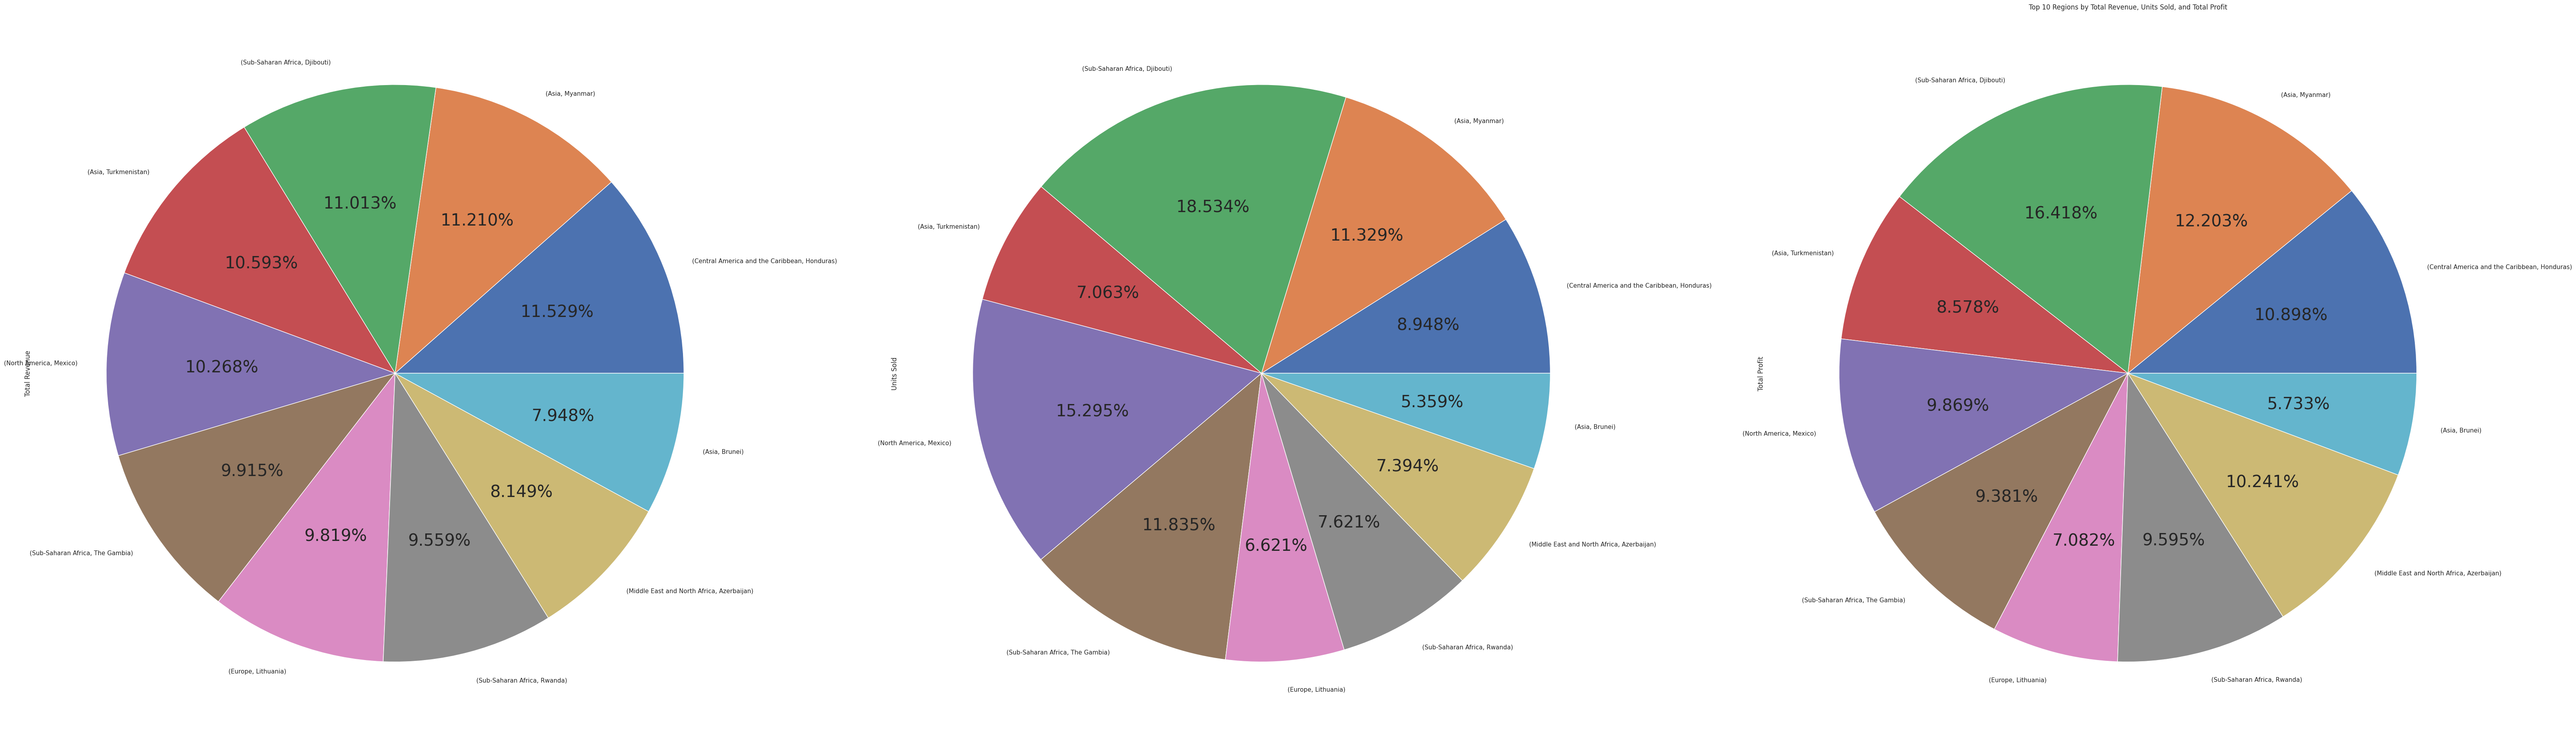

In [ ]:
numerical_columns = ['Total Revenue', 'Units Sold', 'Total Profit']
top_regions = df_amazon.groupby(["Region", "Country"])[numerical_columns].sum().nlargest(10, "Total Revenue")

top_regions.plot(kind="pie", autopct="%0.3f%%", subplots=True, legend=False, figsize=(80, 60))
plt.title("Top 10 Regions by Total Revenue, Units Sold, and Total Profit")
plt.rc("font", size=50)
plt.show()


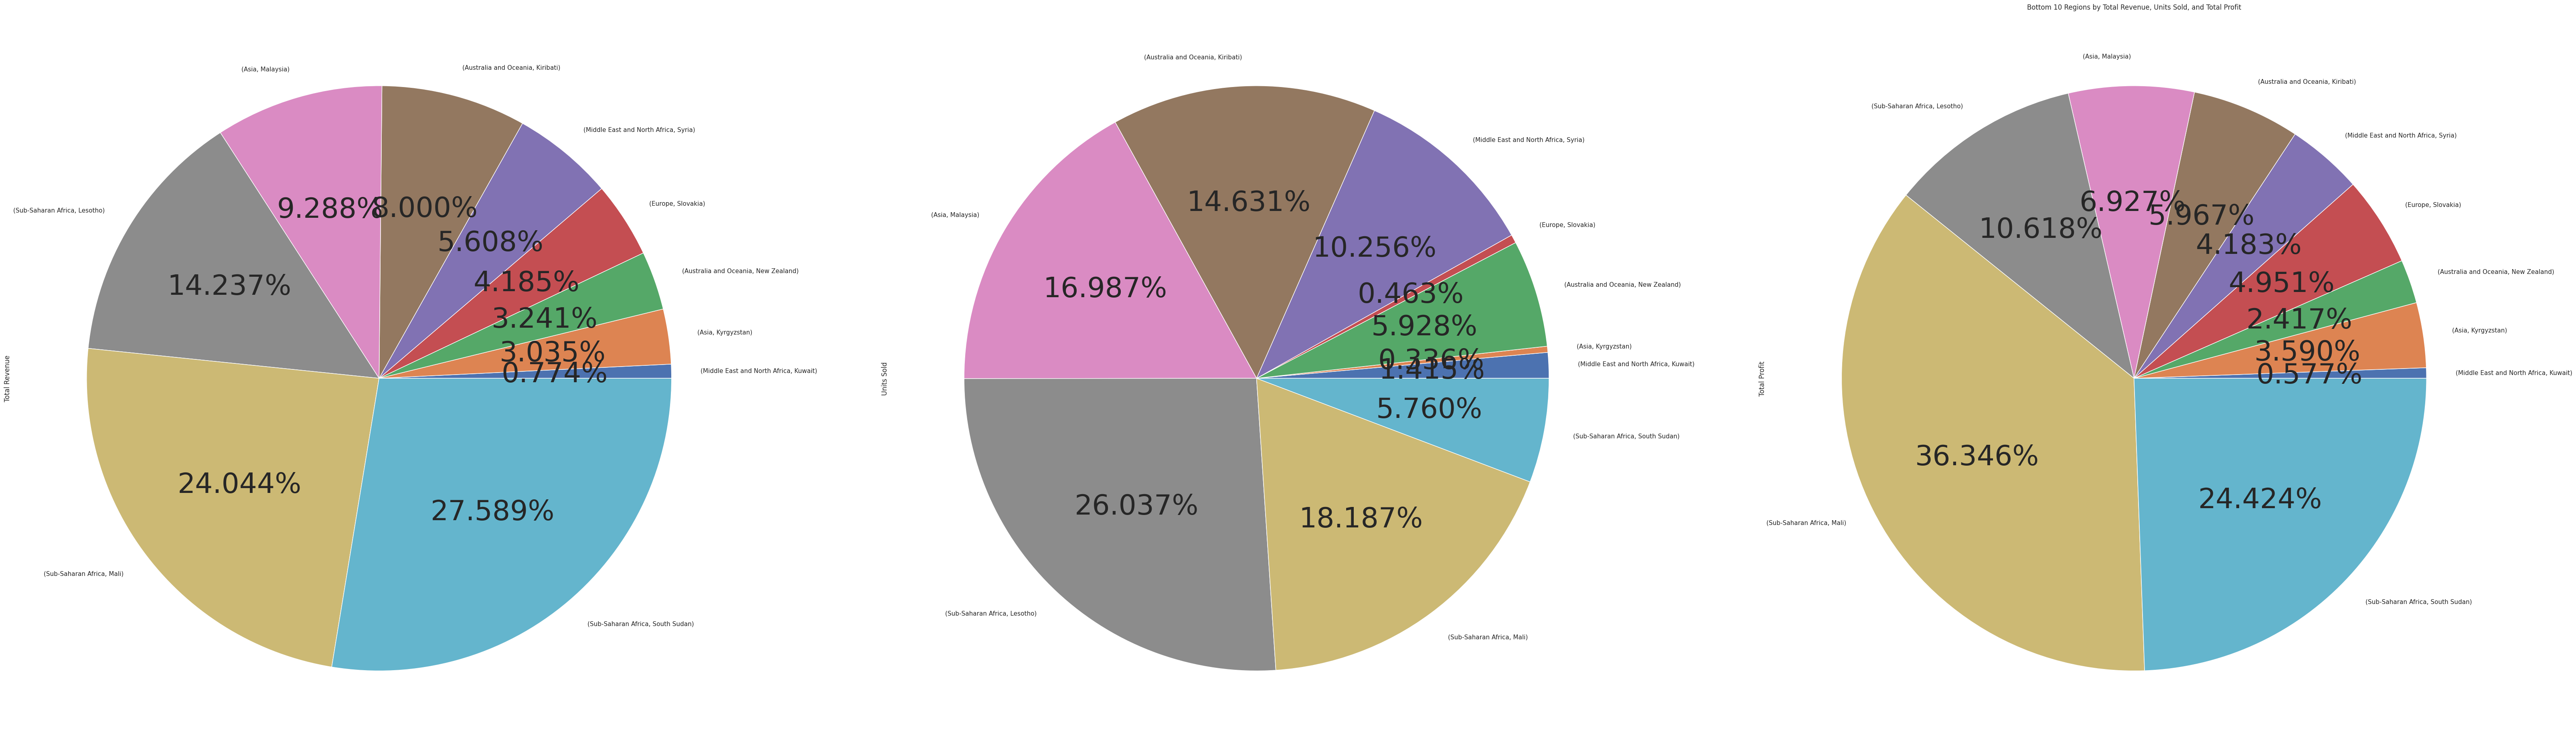

In [ ]:
numerical_columns = ['Total Revenue', 'Units Sold', 'Total Profit']
top_regions = df_amazon.groupby(["Region", "Country"])[numerical_columns].sum().nsmallest(10, "Total Revenue")

top_regions.plot(kind="pie", autopct="%0.3f%%", subplots=True, legend=False, figsize=(80, 60))
plt.title("Bottom 10 Regions by Total Revenue, Units Sold, and Total Profit")
plt.rc("font", size=50)
plt.show()

## **Monthly-Yearly tend insights:**

Highest sales and profit in december 2016

second highest is in august 2013

Maximum units sold 'Cosmetics' at december 2016 qty:"22308"

Minimum units sold 'Vegetables' july 2011 qty:"124"

Max frequently ordered item in overall month and year is 'Cosmetics'

Max item volume sold in sub-saharan Africa,Lesotho

maximum profit from sub-saharan Africa,Mali

Maximum Sales from sub-saharan Africa,South Sudan

In [ ]:
# Export the csv file
#Data.to_csv('Amazone_sales_data.csv',index=False)